In [2]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [3]:
# Load the data
hitters = pd.read_csv("C:/Users/Krist/OneDrive - Aarhus Universitet/Dokumenter/Computerteknologi/2. semester/Decision Support Systems/Data/Hitters.csv", index_col=0).dropna()

In [4]:
y = hitters.Salary
dummies = pd.get_dummies(hitters[['League', 'Division', 'NewLeague']])

In [5]:
# Remove salary and the problematic variables from set
x_temp = hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

# Insert dummy variables in data set
x = pd.concat([x_temp, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

# Lab 6.7.1 PCR

In [10]:
pca = PCA()
X_reduced = pca.fit_transform(scale(x))

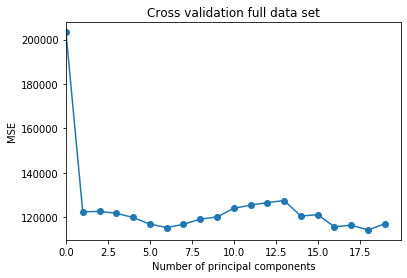

In [11]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-o')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.title('Cross validation full data set')
plt.xlim(xmin=0);

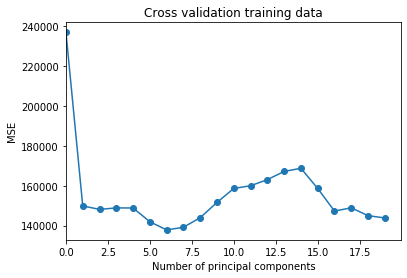

In [14]:
pca2 = PCA()

X_train, X_test , y_train, y_test = model_selection.train_test_split(x, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-o')
plt.xlabel('Number of principal components')
plt.ylabel('MSE')
plt.title('Cross validation training data')
plt.xlim(xmin=0);

In [15]:
numberOfComponents = 7
X_reduced_test = pca2.transform(scale(X_test))[:,:numberOfComponents]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:numberOfComponents], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

111994.42273636989

# Lab 6.7.2 - Partial Least Squares

(-1, 19.9)

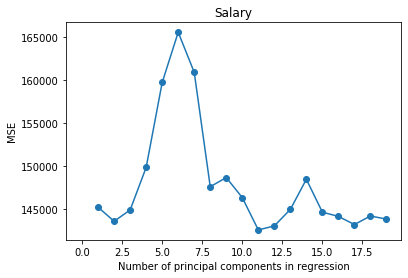

In [16]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

In [20]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

104838.51042760804